In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

## 生成数据

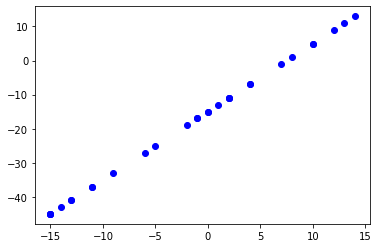

In [3]:
np.random.seed(123)
w_real = 2
b_real = -15
xlim = [-15, 15]
x_gen = np.random.randint(low=xlim[0], high=xlim[1], size=30)
y_real = w_real * x_gen + b_real
plt.plot(x_gen, y_real, 'bo')

In [4]:
def sgd(x, y, lr, epochs=1):
    # x 为训练集中的数据
    # y 为训练集中标签
    # lr 学习率
    # epochs 训练epoch数
    
    # 随机初始化w与b
    w = random.random()
    b = random.random()
    for e in range(epochs):
        w_list.append(w)
        b_list.append(b)
        for x_ , y_ in zip(x, y):
            w = w - lr * x_ * (w * x_ + b - y_)
            b = b - lr * (w * x_ + b - y_)

    return w, b

# 用于记录w与b的变化
w_list = []
b_list = []
w, b = sgd(x_gen, y_real, 0.001, epochs=150) 

print("w = {:.3f} , b = {:.3f}".format(w, b))

w = 2.006 , b = -14.742


# 打印预测结果

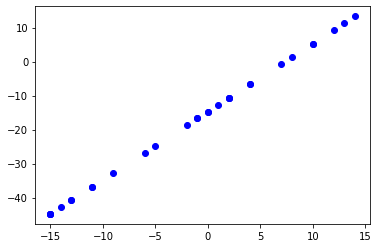

In [5]:
y_predict = w * x_gen + b
plt.plot(x_gen, y_predict, 'bo')

# 观察w与b的变化

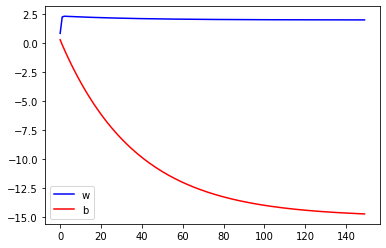

In [6]:
l_w=plt.plot(np.array(range(150)), np.array(w_list), 'b-',label='w')
l_b=plt.plot(np.array(range(150)), np.array(b_list), 'r-',label='b')
plt.legend()

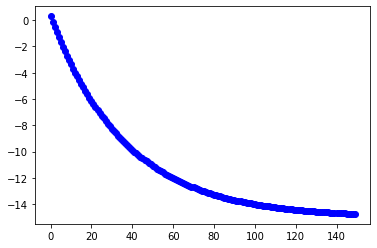

In [7]:
plt.plot(np.array(range(150)), np.array(b_list), 'bo')

# 房价预测
使用sklearn加载数据，并且调用SGDRegression进行预测
## 加载模块

In [9]:
import sys
from sklearn import datasets
# 分割数据的模块，把数据集分为训练集和测试集
from sklearn.model_selection import train_test_split
# 导入回归方法
from sklearn.linear_model import SGDRegressor

try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

## 加载数据

In [10]:
boston_data = datasets.load_boston()

## 观察数据

In [11]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
import pandas as pd

# 加载数据到dataframe中
df = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# 查看数据是否有缺失值
# 通过结果可以发现并没有缺失值
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

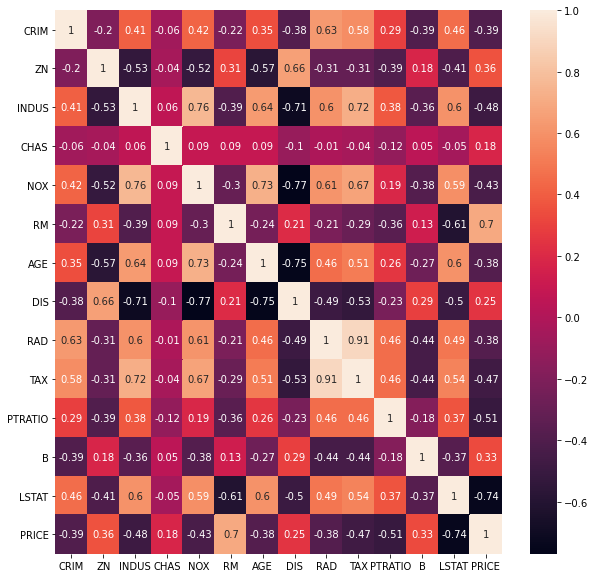

In [19]:
# 观察属性间的相关性
import seaborn as sns

df['PRICE'] = boston_data.target
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10, 10))
pearson=sns.heatmap(data=correlation_matrix, annot=True)
pearson = pearson.get_figure()
pearson.savefig('corr.png', dpi = 400)

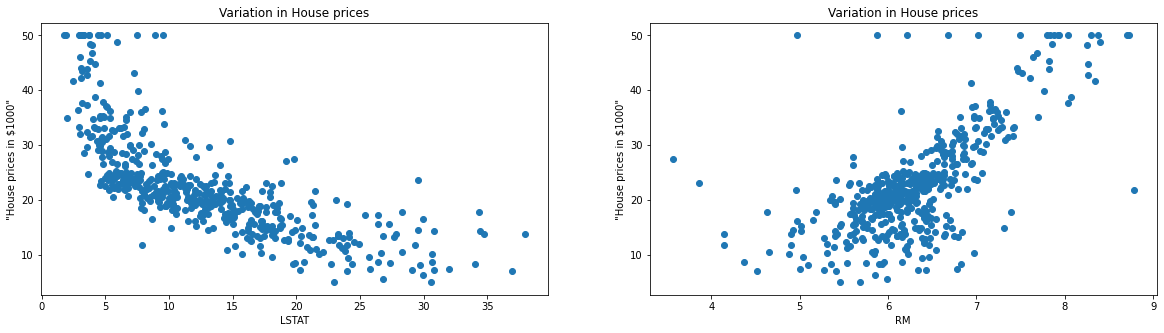

In [20]:
# LSTAT、RM与PRICE的散点图
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [35]:
# sklearn把数据分为了data（输入）与target（输出）两部分
# 只使用RM训练
data_X = boston_data.data[:, 5].reshape(-1, 1)

data_y = boston_data.target
# 将数据集分割成训练集与测试集，其中测试集占30%
X_train, X_test, y_train, y_test = train_test_split(data_X,data_y, test_size=0.3)

## 训练
设置loss为squared_loss

学习率为0.001

迭代次数为1000次。

tol为None。如果不为None，则当前迭代loss如果大于前一个loss，训练就会终止

verbose默认为0，设置为1我们可以打印出训练过程中的信息，如loss。

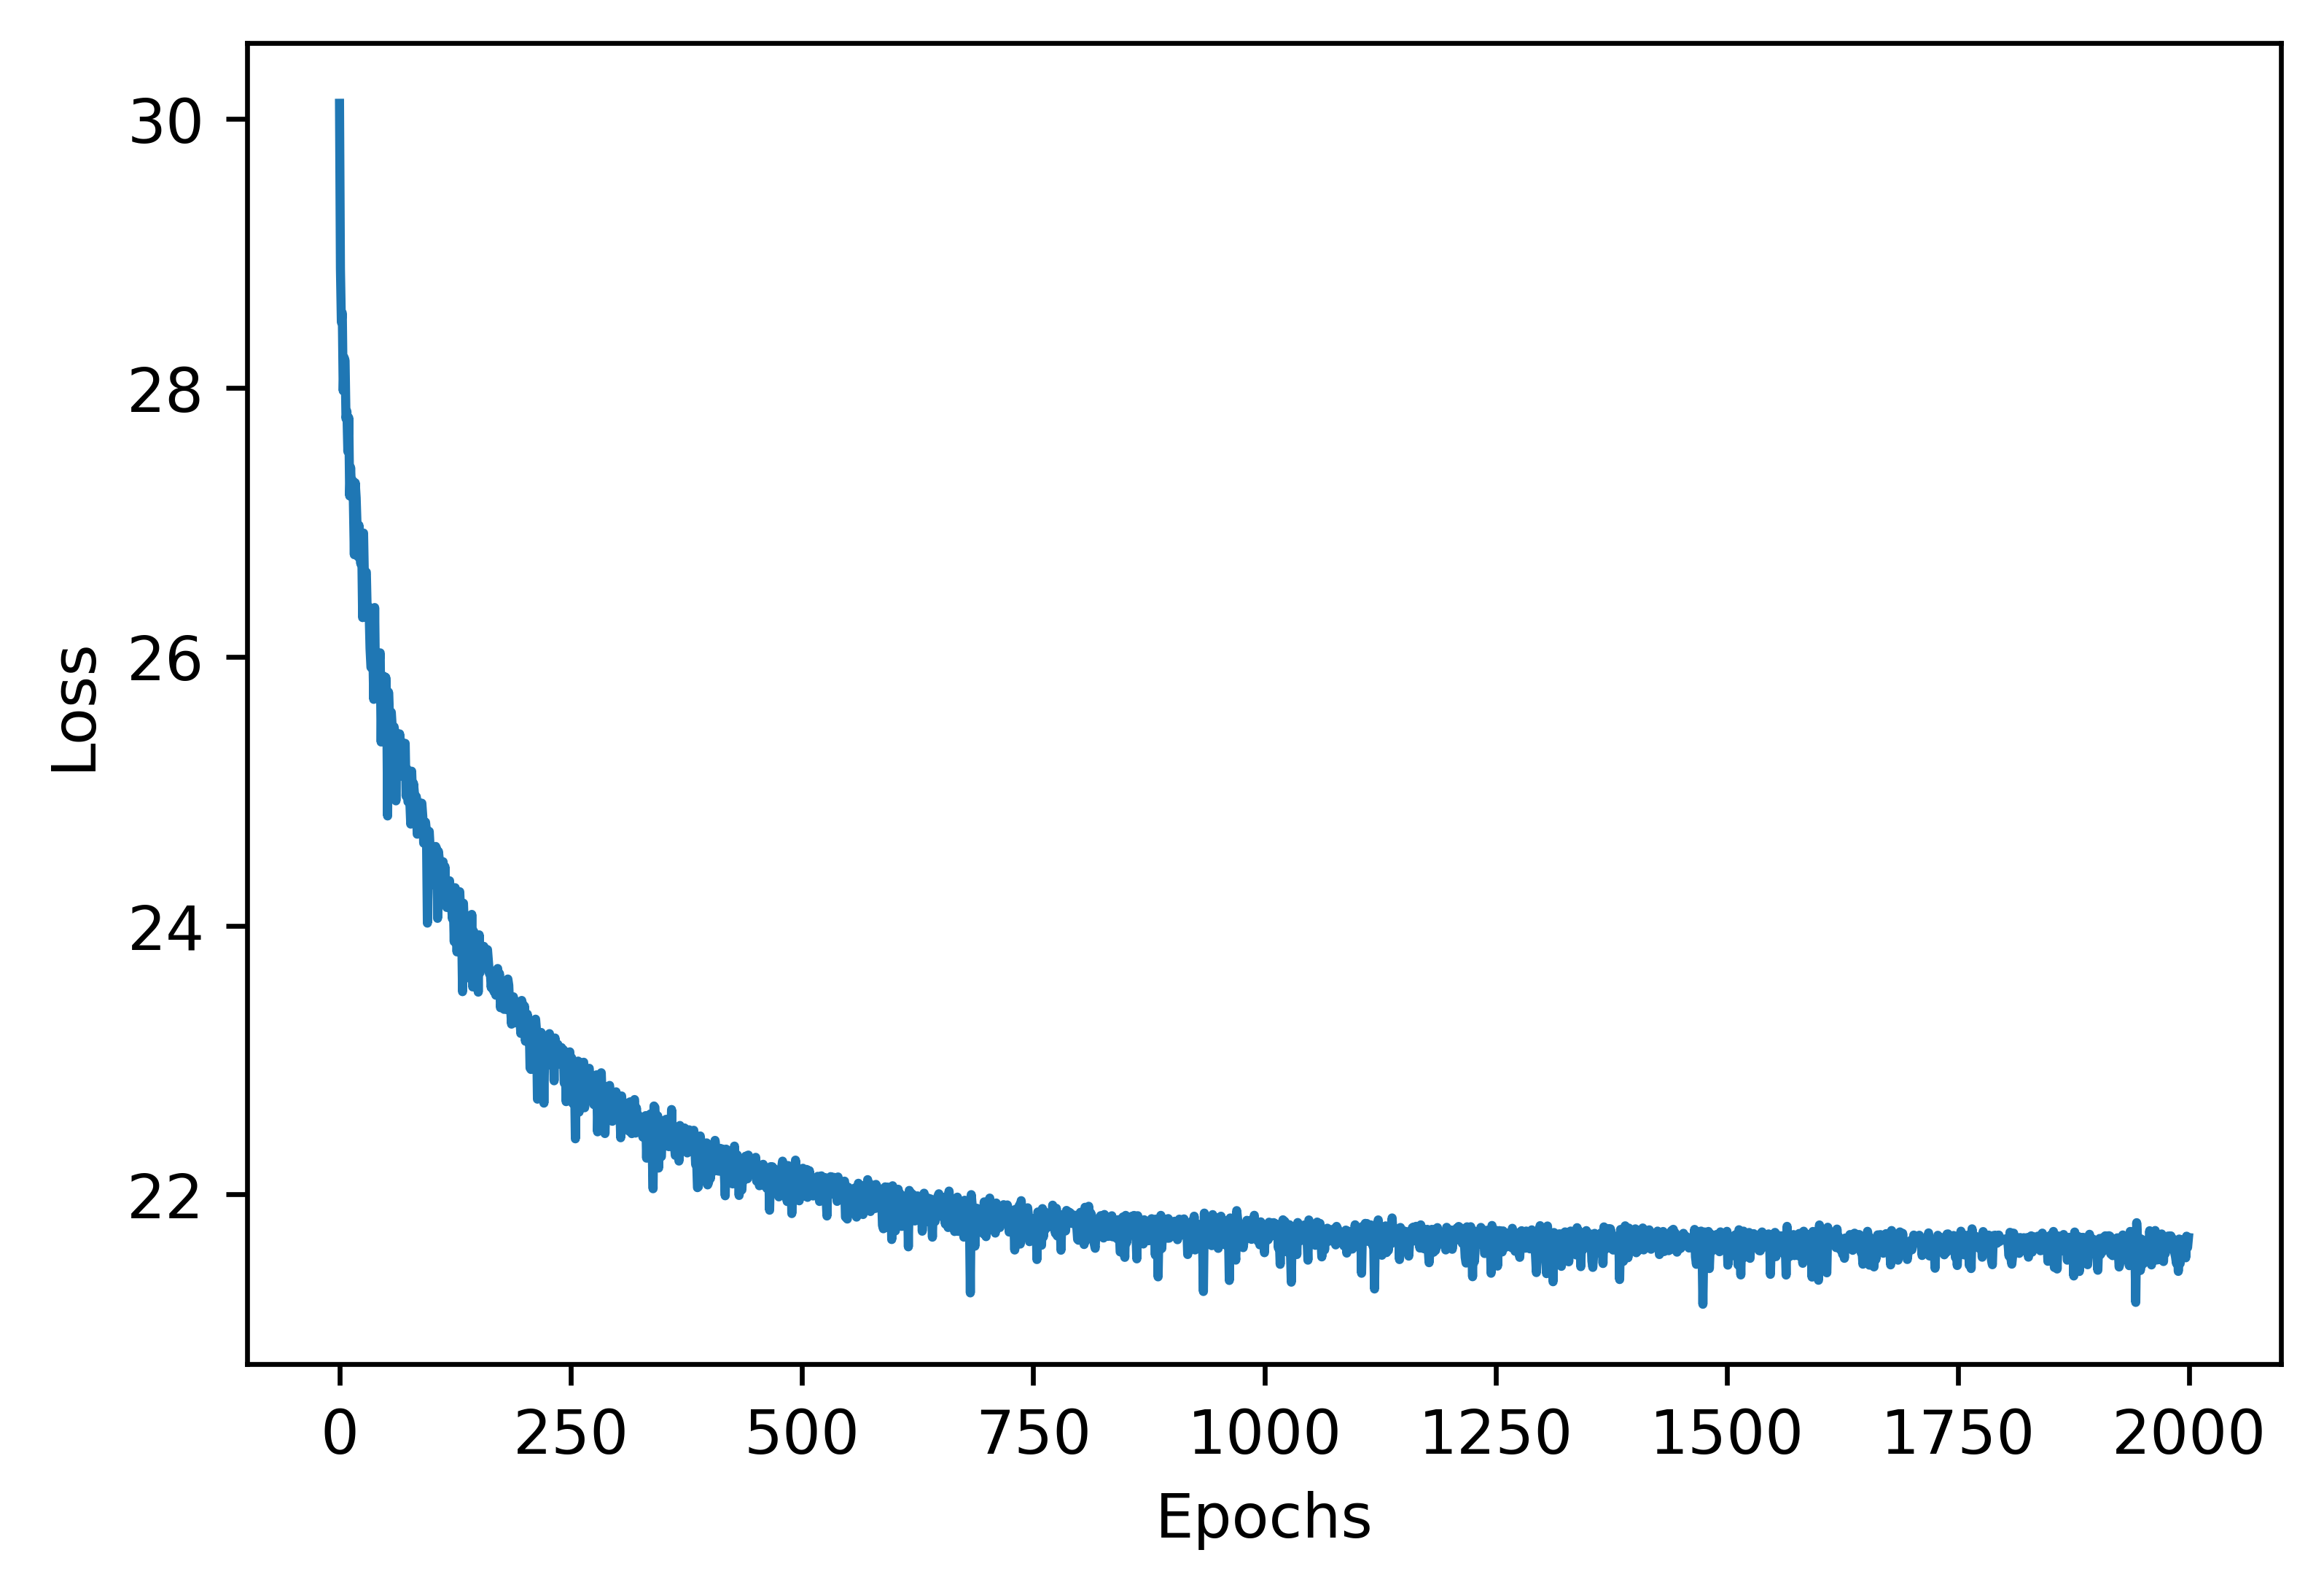

In [36]:
sys_stdout = sys.stdout
myout = StringIO()
sys.stdout = myout
model = SGDRegressor(loss='squared_loss', tol=None, l1_ratio = 0.001, max_iter=2000, verbose=1)
# 用 training data 去训练模型
model.fit(X_train, y_train)
sys.stdout = sys_stdout
loss_history = myout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure(dpi = 600)
plt.plot(np.arange(len(loss_list)),loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## 评估
采用均方根误差进行评估

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
y_predict = model.predict(X_test)

In [39]:
# 使用mean_squared_error模块，并输出评估结果。
print('The mean squared error of SGDRegressor is', mean_squared_error(y_test, y_predict))

The mean squared error of SGDRegressor is 46.2308987235099
